# Bagging and Boosting Ensemble Techniques

In [1]:
'''BAGGING                                                                      BOOSTING

1.learns them independently-Parallel                    1. learns them sequentially in a very adaptative way
                                                         a base model depends on the previous ones
    
2.result by averaging the responses of the N learners   2.result by weighted majority average vote allocating to each resulting model

3.Bagging may solve the over-fitting problem,           3.Boosting tries to reduce bias
   while Boosting can increase it.
    
4. Train and Keep Technique                              4. Train and evaluate Technique

5. a way to decrease the variance of your prediction     5.Boosting tries to reduce bias

6. suitable for high variance low bias models           6. suitable for low variance high bias model

'''

'BAGGING                                                                      BOOSTING\n\n1.learns them independently-Parallel                    1. learns them sequentially in a very adaptative way\n                                                         a base model depends on the previous ones\n    \n2.result by averaging the responses of the N learners   2.result by weighted majority average vote allocating to each resulting model\n\n3.Bagging may solve the over-fitting problem,           3.Boosting tries to reduce bias\n   while Boosting can increase it.\n    \n4. Train and Keep Technique                              4. Train and evaluate Technique\n\n5. a way to decrease the variance of your prediction     5.Boosting tries to reduce bias\n\n6. suitable for high variance low bias models           6. suitable for low variance high bias model\n\n'

In [2]:
import pandas as pd 
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from sklearn.externals import joblib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%pwd

'C:\\Users\\shrey\\Desktop\\ML-DL-NLP\\ML Asg 2\\ML Asg 2'

In [4]:
my_path = 'C:\\Users\\shrey\\Desktop\\ML-DL-NLP\\ML Asg 2\\ML Asg 2'

In [5]:
my_df = pd.read_csv(f'{my_path}\Titanic_full(2).csv')
print(my_df.shape)
my_df.head(3)

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


train_df,test_df = mydf_splitter(my_df,1100)

print(train_df.shape,test_df.shape)

(1100, 12) (209, 12)


In [7]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms


,Total,Percent
Cabin,849,77.181818
Age,219,19.909091
Embarked,2,0.181818
Fare,1,0.090909


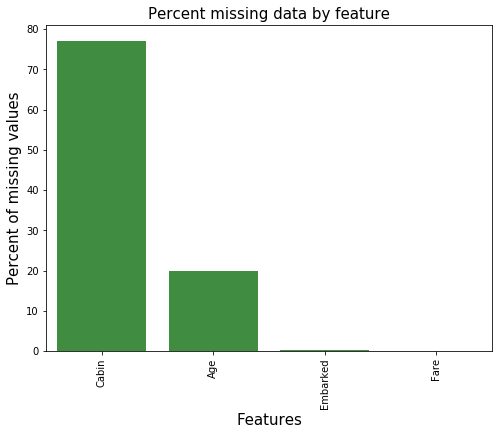

In [8]:
missingdata(train_df)

,Total,Percent
Cabin,165,78.947368
Age,44,21.052632


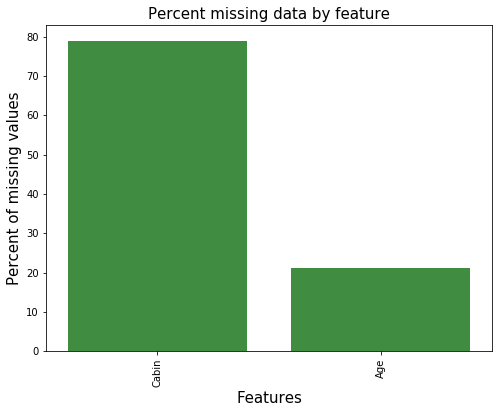

In [9]:
missingdata(test_df)

In [10]:
test_df['Age'].mean()

30.25557575757576

In [11]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [12]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [13]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

In [14]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [15]:
print('check the nan value in train data')
print(train_df.isnull().sum())
print('___'*30)
print('check the nan value in test data')
print(test_df.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64
__________________________________________________________________________________________
check the nan value in test data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [16]:
## combine test and train as single to apply some function
all_data=[train_df,test_df]

In [17]:
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [18]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [19]:
## create bin for age features
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [20]:
## create bin for fare features
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [21]:
### for our reference making a copy of both DataSet start working for copy of dataset
traindf=train_df
testdf=test_df

In [22]:
all_dat=[traindf,testdf]

In [23]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [24]:
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [25]:
testdf.head(2)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
1100,1101,1,3,male,0,0,S,1,Mr,Adult,Low_fare
1101,1102,0,3,male,0,0,S,1,Mr,Adult,Average_fare


In [26]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [27]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [28]:
testdf.head()

,PassengerId,Survived,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
1100,1101,1,3,0,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
1101,1102,0,3,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1102,1103,1,3,0,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
1103,1104,0,2,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1104,1105,0,2,1,0,2,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


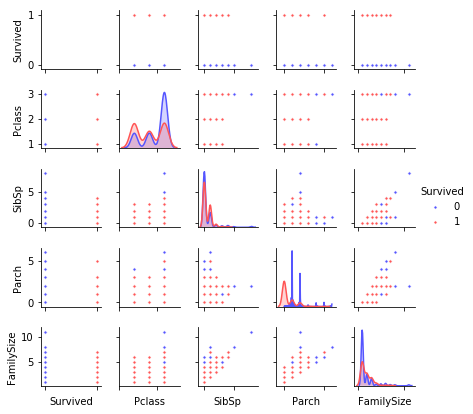

In [29]:
g = sns.pairplot(data=train_df, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [30]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((770, 22), (330, 22), (770,), (330,))

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 74.24
The cross validated score for AdaBoostClassifier is: 76.67


Text(0.5, 1.05, 'Confusion_matrix')

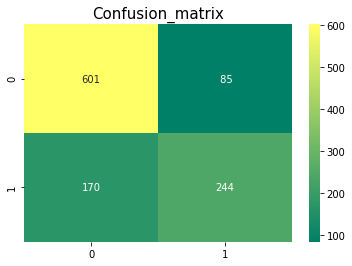

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [32]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X  = testdf.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((1100, 22), (1100,), (209, 23))

In [33]:
#Hyper parameter tunning
# Gradient boosting tunning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(train_X,train_Y)

# Best score
modelf.best_score_
# Best Estimator
modelf.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   21.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   40.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:  1.6min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=150, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
modelf.best_score_

0.7645454545454545